In [1]:
!pip install tensorflowjs

# Food recommendations based on weather and temperature

In the ever-growing food industry, especially among street vendors, weather, temperature, and customer preferences based on ratings have a significant influence on food purchasing decisions. For example, on a hot day, customers tend to look for refreshing food or drinks, while on a cold or rainy day, they are more interested in warm and soupy food. In addition, the ratings given by customers to certain foods also provide an overview of the most preferred foods and can be the basis for more personalized recommendations.

This recommendation system based on weather, temperature, and customer ratings is designed to help customers determine food choices that suit their preferences and environmental conditions. This system can recommend menus such as es cendol or iced tea on a hot day, or bakso and wedang jahe on a rainy day, while considering high ratings from other customers to provide more reliable recommendations. By utilizing real-time weather data, customer rating data, and machine learning algorithms such as collaborative filtering, the system can analyze rating patterns to identify similar foods that customers might like.

In addition to helping customers, this system also provides great benefits for street vendors. Using rating data and weather analysis, merchants can adjust stock and target menus that are most likely to be of interest to customers in certain conditions. Technologies such as real-time location can also be used to update temperature and weather data directly from the merchant’s location, while providing information about customer preferences in that location.

Key Benefits:

1. For Customers: The system enhances the dining experience by providing relevant, reliable recommendations based on other customers’ ratings and current environmental conditions.
2. For Merchants: The system helps merchants increase sales, reduce food waste, and improve operational efficiency by optimizing routes and food stock based on rating and weather data.

The application of this technology is expected to not only increase customer satisfaction but also strengthen the competitiveness of street vendors amidst the ever-changing dynamics of the food market. With an approach based on weather, temperature, and customer rating data, the dining experience becomes more personal, relevant, and memorable for all parties involved.








## Business Understanding

**Problem Statements**

Based on the challenges faced by street vendors in reaching customers and adjusting their menus to preferences relevant to environmental conditions, a weather and temperature-based food recommendation system will be developed to address the following issues:

1. How can a recommendation system help street vendors find potential customers based on location patterns, time, and weather conditions?
2. How can data such as the type of food sold by vendors, weather conditions, and temperature be utilized to provide menu recommendations that match customer preferences around the vendor's location?
3. Based on customer data, how to create a personalized recommendation system with content-based filtering techniques?
4. With the rating data you have, how can restaurants recommend other foods that customers might like and have never ordered?

**Goals**

To address the challenges faced by street vendors in finding customers and providing relevant food recommendations based on weather and temperature, a recommendation system will be developed with the following objectives:

1. Generating food recommendations that are relevant to weather and temperature conditions using content-based filtering techniques. The system will utilize data such as the type of food offered by the vendor, weather, and temperature to provide menu recommendations that match customer preferences around the vendor's location.

2. Increasing the reach of street vendors to potential customers. The system will help vendors find strategic locations based on customer activity patterns, environmental conditions, and specific times to increase sales opportunities.

3. Providing a personalized recommendation experience. The system will ensure that food recommendations are not only relevant to the weather but also aligned with customer preference patterns that have been previously identified through interactions and historical data.

4. Generate a number of personalized food recommendations for customers with content-based filtering techniques.

5. Generate a number of food recommendations that match customer preferences and have never been visited before using collaborative filtering techniques.

**Solution Statement**

To achieve these goals, the following steps will be taken:

1. **Data Understanding**: Data Understanding is the initial stage of the project to understand the data that is owned.

2. **Univariate Exploratory Data Analysis**: At this stage, analysis and exploration of each variable in the data is carried out. If needed, further exploration can be carried out regarding the relationship between one variable and another.

3. **Data Preparation**: At this stage, the process of preparing data is carried out and several techniques are carried out such as overcoming missing values, duplicate data, and dirty data.

4. **Model Development dengan Content-Based Filtering**: At this stage, a food recommendation system will be developed using the content-based filtering technique, which recommends items based on similarities with items that have been liked or are relevant to user preferences. The representation of the frequency of occurrence features of each category or food description will be generated using Count Vectorizer and the level of similarity between foods is calculated using cosine similarity. Based on this similarity, food recommendations will be made for customers adjusted to the current weather and temperature conditions.

5. **Model Development dengan Collaborative Filtering**: At this stage, the system recommends a number of foods based on previously given ratings. From user rating data, we will identify similar foods that have never been ordered by users to recommend.

## Data Understanding

This dataset is used to build a food recommendation system based on content-based filtering, where features such as describe, category_type, weather, and temperature are used to calculate the degree of similarity between foods using techniques such as Count Vectorizer and Cosine Similarity. Meanwhile, the second dataset has 300 rows of data with 3 numeric features, namely User_ID, Food_ID, and Rating.

## Data Loading

### Upload Datasets

In [2]:
from google.colab import files

# Upload file CSV Dataset Pedagang
uploaded = files.upload()

# Upload file CSV Rating
uploaded = files.upload()

### Import The Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model

### Load File ke DataFrame

In [4]:
foods = pd.read_csv('Dataset Makanan Pedagang.csv')
ratings = pd.read_csv('Rating.csv')

print(f"shape of foods: {foods.shape}")
print(f"shape of ratings: {ratings.shape}")

shape of foods: (100, 10)
shape of ratings: (500, 3)


In [5]:
# Lihat beberapa baris data untuk memastikan file terbaca
print(foods.head())
print(ratings.head())

   id  merchant_id                 name  \
0   1            1  Nasi Goreng Spesial   
1   2            2           Mie Goreng   
2   3            3           Mie Lendir   
3   4            4          Baso Malang   
4   5            5              Batagor   

                                         description  price           image  \
0  Nasi goreng lezat dengan tambahan telur dan ayam.  25000  NasiGoreng.jpg   
1   Mie goreng lezat dengan tambahan telur dan ayam.  20000   MieGoreng.jpg   
2   Mie Lendir lezat dengan tambahan telur dan ayam.  15000   MieLendir.jpg   
3     Bakso Malang lezat dengan kuah gurih dan enak.  15000  BasoMalang.jpg   
4  Batagor Ikan lezat dengan kuah kering dari kac...  10000     Batagor.png   

  temperature                  weather_main                 createdAt  \
0      0 - 20  Clear, Clouds, Drizzle, Rain  2024-12-05T17:16:10.565Z   
1      0 - 45  Clear, Clouds, Drizzle, Rain  2024-12-05T17:16:10.565Z   
2      0 - 45  Clear, Clouds, Drizzle, Rain  20

# Univariate Exploratory Data Analysis

**Foods Dataset**

In [6]:
foods.sample(5)

,id,merchant_id,name,description,price,image,temperature,weather_main,createdAt,updatedAt
99,100,100,Ayam Taliwang,Ayam khas Lombok dengan bumbu pedas menggoda.,30000,AyamTaliwang.jpg,0 - 45,"Clear, Clouds, Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
71,72,72,Es Jeruk Nipis,Minuman segar dari jeruk nipis peras dan es batu.,10000,EsJerukNipis.jpg,25 – 45,"Clear, Clouds",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
55,56,56,Tahu Bulat,"Tahu goreng renyah, enak disantap hangat.",5000,TahuBulat.jpg,25 – 45,"Clear, Clouds, Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
44,45,45,Es Kulkul,Buah Buahan yang dibekukan lalu dilumuri coklat,5000,EsKulKul.jpg,25 – 45,"Clear, Clouds",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
84,85,85,Ikan Bakar Jimbaran,"Ikan bakar dengan bumbu khas Jimbaran, Bali.",50000,IkanBakarJimbaran.jpg,0 - 20,"Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z


In [7]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    int64 
 1   merchant_id   100 non-null    int64 
 2   name          100 non-null    object
 3   description   100 non-null    object
 4   price         100 non-null    int64 
 5   image         100 non-null    object
 6   temperature   100 non-null    object
 7   weather_main  100 non-null    object
 8   createdAt     100 non-null    object
 9   updatedAt     100 non-null    object
dtypes: int64(3), object(7)
memory usage: 7.9+ KB


In [8]:
foods.describe()

,id,merchant_id,price
count,100.000000,100.000000,100.000000
mean,50.500000,50.500000,15765.000000
std,29.011492,29.011492,8682.228162
min,1.000000,1.000000,2500.000000
25%,25.750000,25.750000,10000.000000
50%,50.500000,50.500000,15000.000000
75%,75.250000,75.250000,20000.000000
max,100.000000,100.000000,50000.000000


In [9]:
foods.describe(include='O')

,name,description,image,temperature,weather_main,createdAt,updatedAt
count,100,100,100,100,100,100,100
unique,91,100,92,3,3,1,1
top,Es Doger,Nasi goreng lezat dengan tambahan telur dan ayam.,EsDoger.jpg,25 – 45,"Clear, Clouds, Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
freq,2,1,2,42,56,100,100


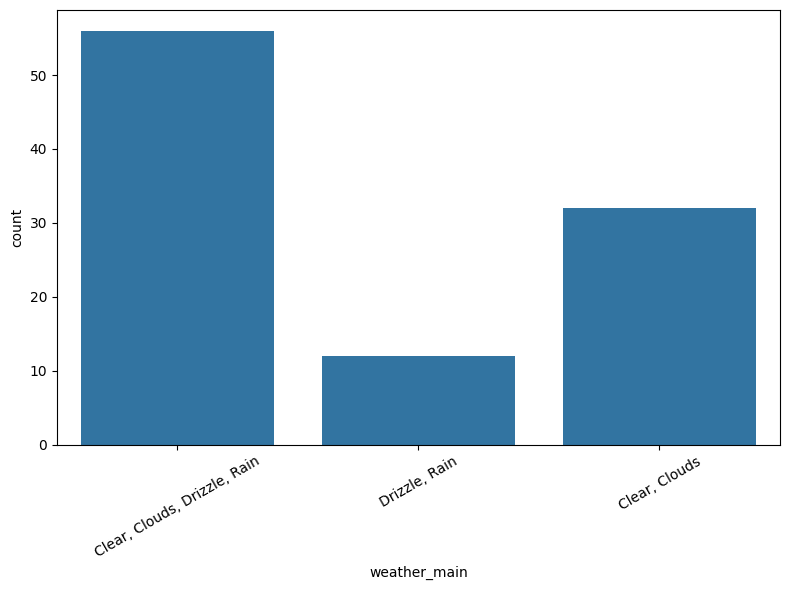

In [10]:
plt.figure(figsize=(8,6))

sns.countplot(x='weather_main', data=foods)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("weather.png", bbox_inches='tight')

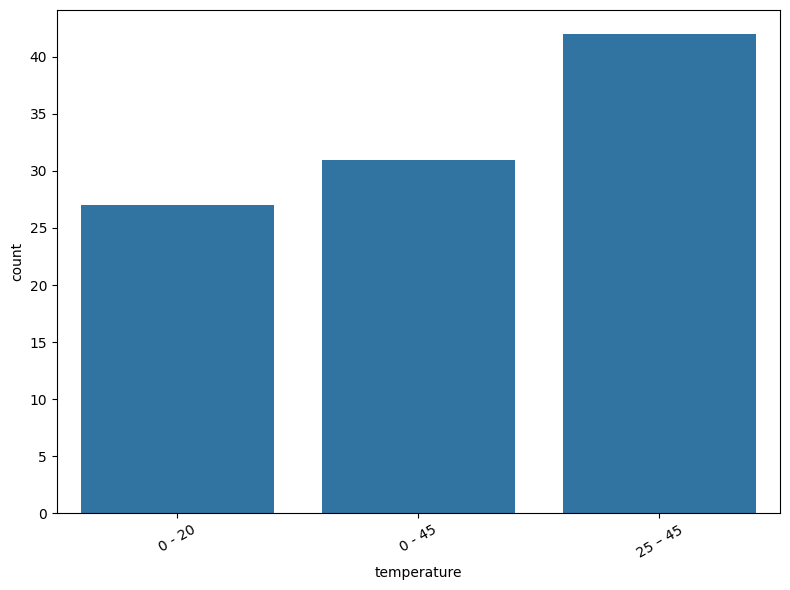

In [11]:
plt.figure(figsize=(8,6))

sns.countplot(x='temperature', data=foods)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("temperature.png", bbox_inches='tight')

**Ratings Dataset**

In [12]:
ratings.sample(5)

,user_id,merchant_id,rating
67,68,89,2
313,314,59,1
321,322,100,3
110,111,84,5
305,306,39,5


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      500 non-null    int64
 1   merchant_id  500 non-null    int64
 2   rating       500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


Note, there is a difference between Non-Null Count (300) and entries (300) which indicates missing values ​​in each of these features. In addition, there is no problem with the data type, but for consistency with the Food_ID data type in the previous dataset, foods is int, so in the rating dataset, a data type conversion will be performed for the User_ID and Food_ID features from float to int at the Data Preparation stage.

In [14]:
ratings.describe()

,user_id,merchant_id,rating
count,500.000000,500.000000,500.000000
mean,250.500000,51.156000,3.028000
std,144.481833,28.796704,1.411098
min,1.000000,1.000000,1.000000
25%,125.750000,27.000000,2.000000
50%,250.500000,52.000000,3.000000
75%,375.250000,77.000000,4.000000
max,500.000000,100.000000,5.000000


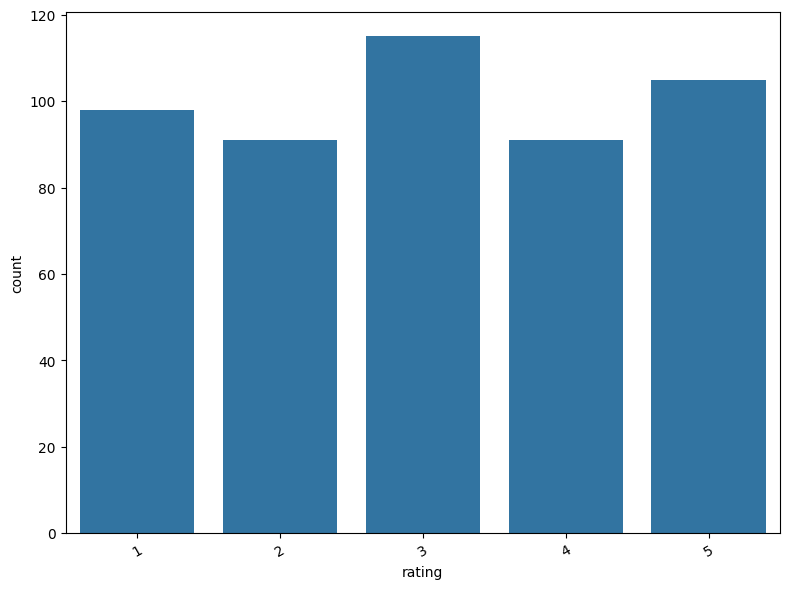

In [15]:
plt.figure(figsize=(8,6))

# Assuming the column containing the ratings is named 'rating', change 'ratings' to 'rating'
sns.countplot(x='rating', data=ratings)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("ratings.png", bbox_inches='tight')

The distribution of ratings given by users is quite even for each rating value in the range of 1 to 5.

In [16]:
rate_up = ratings[ratings['rating'] >= 8]  # Change 'Rating' to 'rating'
rate_up['merchant_id'].value_counts().head(5)

,count
merchant_id,


In [17]:
rate_down = ratings[ratings['rating'] <= 3]
rate_down['merchant_id'].value_counts().head(5)

,count
merchant_id,
48,8
89,8
56,8
39,7
69,7


## Data Exploration

In [18]:
# Dataset size
print("Dimensi dataset:", foods.shape)

# Data type info
print("\nInformasi dataset:")
foods.info()

# Cek missing values
print("\nJumlah missing values:")
print(foods.isnull().sum())

Dimensi dataset: (100, 10)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    int64 
 1   merchant_id   100 non-null    int64 
 2   name          100 non-null    object
 3   description   100 non-null    object
 4   price         100 non-null    int64 
 5   image         100 non-null    object
 6   temperature   100 non-null    object
 7   weather_main  100 non-null    object
 8   createdAt     100 non-null    object
 9   updatedAt     100 non-null    object
dtypes: int64(3), object(7)
memory usage: 7.9+ KB

Jumlah missing values:
id              0
merchant_id     0
name            0
description     0
price           0
image           0
temperature     0
weather_main    0
createdAt       0
updatedAt       0
dtype: int64


In [19]:
# Dataset size
print("Dimensi dataset:", ratings.shape)

# Data type info
print("\nInformasi dataset:")
ratings.info()

# Cek missing values
print("\nJumlah missing values:")
print(ratings.isnull().sum())

Dimensi dataset: (500, 3)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      500 non-null    int64
 1   merchant_id  500 non-null    int64
 2   rating       500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB

Jumlah missing values:
user_id        0
merchant_id    0
rating         0
dtype: int64


## Data Cleaning

In [20]:
# Data cleaning
foods['weather_main'] = foods['weather_main']
foods['temperature'] = foods['temperature']

foods = foods.drop_duplicates()

# Drop duplicates if any
foods.drop_duplicates(inplace=True)

# Final cleaned DataFrame
foods.head()

,id,merchant_id,name,description,price,image,temperature,weather_main,createdAt,updatedAt
0,1,1,Nasi Goreng Spesial,Nasi goreng lezat dengan tambahan telur dan ayam.,25000,NasiGoreng.jpg,0 - 20,"Clear, Clouds, Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
1,2,2,Mie Goreng,Mie goreng lezat dengan tambahan telur dan ayam.,20000,MieGoreng.jpg,0 - 45,"Clear, Clouds, Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
2,3,3,Mie Lendir,Mie Lendir lezat dengan tambahan telur dan ayam.,15000,MieLendir.jpg,0 - 45,"Clear, Clouds, Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
3,4,4,Baso Malang,Bakso Malang lezat dengan kuah gurih dan enak.,15000,BasoMalang.jpg,25 – 45,"Drizzle, Rain",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z
4,5,5,Batagor,Batagor Ikan lezat dengan kuah kering dari kac...,10000,Batagor.png,25 – 45,"Clear, Clouds",2024-12-05T17:16:10.565Z,2024-12-05T17:16:10.565Z


In [21]:
foods.isna().any()

,0
id,False
merchant_id,False
name,False
description,False
price,False
image,False
temperature,False
weather_main,False
createdAt,False
updatedAt,False


In [22]:
foods.duplicated().any()

False

In addition, the foods dataset also does not contain duplicate data so it is ready to be used in the Modeling stage.

In [23]:
# Data cleaning
ratings = ratings[(ratings['rating'] >= 1) & (ratings['rating'] <= 5)]
ratings.head()

,user_id,merchant_id,rating
0,1,18,1
1,2,47,3
2,3,63,3
3,4,39,1
4,5,69,2


In [24]:
ratings.isna().any()

,0
user_id,False
merchant_id,False
rating,False


In [25]:
ratings.dropna(inplace=True)
ratings.isna().sum()

,0
user_id,0
merchant_id,0
rating,0


In [26]:
ratings.duplicated().any()

False

In addition, the foods dataset also does not contain duplicate data so it is ready to be used in the Modeling stage.

## Content Based Filtering

Content Based Recommendation utilizes information from several items/data to recommend to users as references related to previously used information. The purpose of content based recommendation is to be able to predict similarities from a number of information obtained from users.

In [27]:
features = ['merchant_id', 'name', 'weather_main', 'temperature']
foods[features]

,merchant_id,name,weather_main,temperature
0,1,Nasi Goreng Spesial,"Clear, Clouds, Drizzle, Rain",0 - 20
1,2,Mie Goreng,"Clear, Clouds, Drizzle, Rain",0 - 45
2,3,Mie Lendir,"Clear, Clouds, Drizzle, Rain",0 - 45
3,4,Baso Malang,"Drizzle, Rain",25 – 45
4,5,Batagor,"Clear, Clouds",25 – 45
...,...,...,...,...
95,96,Bandrek,"Drizzle, Rain",0 - 20
96,97,Wedang Ronde,"Drizzle, Rain",0 - 20
97,98,Bakmi Jawa,"Clear, Clouds, Drizzle, Rain",25 – 45
98,99,Nasi Pecel,"Clear, Clouds, Drizzle, Rain",25 – 45


In [28]:
data = 'Dataset Makanan Pedagang.csv'

# Membuat DataFrame dengan membaca data dari file CSV
foods = pd.read_csv(data) # Changed this line to read data from the CSV file

# Fitur yang akan digabungkan
features = ['merchant_id', 'name', 'weather_main', 'temperature']

# Gabungkan fitur menjadi satu kolom 'soup'
foods['soup'] = foods[['name', 'weather_main', 'temperature']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Menampilkan 100 sampel data acak
print(foods.sample(100))

    id  merchant_id                 name  \
68  69           69                Rawon   
0    1            1  Nasi Goreng Spesial   
26  27           27        Fried Chicken   
45  46           46         Kacang Rebus   
75  76           76       Serabi Bandung   
..  ..          ...                  ...   
69  70           70       Martabak Manis   
60  61           61           Sop Buntut   
39  40           40              Kue Sus   
10  11           11              Bandrek   
52  53           53     Pempek Palembang   

                                          description  price  \
68  Sup khas Jawa Timur dengan kuah hitam dari klu...  25000   
0   Nasi goreng lezat dengan tambahan telur dan ayam.  25000   
26                           Ayam Goreng Tepung Sedap  12000   
45  Kacang tanah rebus yang gurih, cocok untuk cam...   5000   
75  Pancake tradisional dengan topping kelapa atau...  12000   
..                                                ...    ...   
69  Martabak dengan top

Join is performed for features that will be used as user preferences by combining the Name, Category_Type, Weather and Temperature features.

**Count Vectorizer**

In [29]:
# Inisialisasi CountVectorizer
count = CountVectorizer(stop_words='english')

# Fit dan transform data
count_matrix = count.fit_transform(foods['soup'])

In [30]:
cosine_sim = cosine_similarity(count_matrix)

Note, for use in the model stage, CountVectorizer will be used to convert text data into a numeric representation by calculating the frequency of occurrence of words in each document. The weights are calculated based on the frequency of occurrence of the words in each document.

In [31]:
# Clean temperature data
foods['temp_min'] = foods['temperature'].str.extract(r'(\d+)').astype(float)
foods['temp_max'] = foods['temperature'].str.extract(r'- (\d+)').fillna(
    foods['temperature'].str.extract(r'>(\d+)')
).astype(float)

In [32]:
# Function for food recommendations by weather
def food_recommendations_by_weather(weather, temp_min, temp_max, top_n=5):
    """
    Provides food recommendations based on weather and temperature range.

    Args:
        weather (str): Weather condition (e.g., 'Clear', 'Clouds', 'Drizzle', 'Rain').
        temp_min (float): Minimum temperature.
        temp_max (float): Maximum temperature.
        top_n (int): Number of desired recommendations.

    Returns:
        list: List of recommended food names.
    """
    # Filter foods by weather condition
    filtered_foods = foods[foods['weather_main'].str.contains(weather, case=False, na=False)]

    # Further filter by temperature range
    filtered_foods = filtered_foods[
        (filtered_foods['temp_min'] <= temp_max) &
        (filtered_foods['temp_max'] >= temp_min)
    ]

    if filtered_foods.empty:
        return []

    # Generate a dummy similarity matrix for demo purposes (replace with real data as needed)
    num_foods = len(foods)
    cosine_sim = np.identity(num_foods)  # Simulate perfect self-similarity

    # Get indices of filtered foods
    food_indices = filtered_foods.index.tolist()
    similarity_scores = cosine_sim[food_indices, :]

    # Rank and retrieve recommendations
    sorted_indices = similarity_scores.argsort(axis=1)[:, ::-1]
    recommendations = []
    recommended_food_ids = set()

    for i in range(len(food_indices)):
        num_recommendations = 0
        for j in sorted_indices[i]:
            food_id = foods['merchant_id'].iloc[j]
            if j != food_indices[i] and food_id not in recommended_food_ids:
                recommendations.append(foods['name'].iloc[j])
                recommended_food_ids.add(food_id)
                num_recommendations += 1
                if num_recommendations >= top_n:
                    break

    return recommendations



Next, a function has been defined to perform a recommendation system for food with a numerical representation using CountVectorizer and feature proximity calculation with Consine Similarity. The following will be tested on one of the foods.

In [33]:
# Contoh penggunaan
recommendations = food_recommendations_by_weather(weather='Drizzle', temp_min=0, temp_max=15, top_n=5)
print(recommendations)

['Pisang Crispy', 'Fried Chicken', 'Cuanki Serayu', 'Bebek Bakar', 'Sop Iga Sapi', 'Ayam Taliwang', 'Kue Odading', 'Sate Madura', 'Nasi Uduk', 'Es Tebu', 'Jus', 'Risol Mayo', 'Gehu Pedas', 'Dadar Gulung', 'Es Kelapa', 'Kue Sus', 'Donat Mini', 'Es Durian', 'Mie Ayam', 'Semangka Potong', 'Es Kulkul', 'Kacang Rebus', 'Es Teh', 'Bubur Ayam', 'Es Doger', 'Nasi Pecel', 'Cireng Racing', 'Mie Goreng', 'Mie Lendir', 'Baso Malang', 'Batagor', 'Es Cendol', 'Es Teler', 'Soto Bandoeng', 'Bakso Tahu', 'Mie Kocok Bandung', 'Bandrek', 'Es Kopi Susu', 'Serabi Bandung', 'Pisang Molen', 'Kue Lapis Legit', 'Kue Apem', 'Rujak', 'Salad Buah', 'Asinan Buah', 'Telor Gulung', 'Roti Bakar', 'Crepes', 'Seblak Seuhah', 'Tahu Gejrot', 'Makaroni Basah', 'Roti Canai', 'Serabi Bandung', 'Es Doger', 'Rendang Padang', 'Soto Betawi', 'Nasi Goreng Kampung', 'Capcay Kuah', 'Es Teler', 'Mie Aceh', 'Ikan Bakar Jimbaran', 'Karedok', 'Sayur Lodeh', 'Pisang Goreng Keju', 'Coto Makassar', 'Ayam Penyet', 'Sate Padang', 'Tahu Gej

## Collaborative Filtering

Collaborative Filtering utilizes a product/item transaction based on the user's behavior/habits. The goal is that the same user and similar items can be liked by the user as a recommendation choice. Collaborative Filtering is generally divided into 2 methods, one of which will be used in this project, namely User-Based Collaborative Filtering. In user-based collaborative filtering, the similarity between users is measured based on their interaction history with items or products. The model learns the pattern of user preferences for items based on the similarity of preferences with other users.

In [34]:
features = ratings[['user_id', 'merchant_id']]
target = ratings['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

After determining the number of users, number of meals, minimum rate, and maximum rate, before dividing the data for training and testing, randomization will be performed using the sampling method.

In [35]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,user_id,merchant_id,rating
361,362,55,1
73,74,74,4
374,375,17,5
155,156,24,2
104,105,20,5
...,...,...,...
106,107,31,5
270,271,25,4
348,349,35,2
435,436,13,3


The data is successfully randomized and is then ready to be split into the following x and y variables.

In [36]:
# Get the minimum and maximum rating values from the 'rating' column
min_rating = ratings['rating'].min()
max_rating = ratings['rating'].max()

x = ratings[['user_id', 'merchant_id']].values
# Now the lambda function can access min_rating and max_rating
y = ratings['rating'].apply(lambda x: round((x - min_rating) / (max_rating - min_rating), 2)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[362  55]
 [ 74  74]
 [375  17]
 [156  24]
 [105  20]
 [395  62]
 [378  88]
 [125  47]
 [ 69  26]
 [451  92]
 [ 10  84]
 [195  72]
 [407  28]
 [ 85   1]
 [372  11]
 [389  79]
 [496  84]
 [ 31  11]
 [317   7]
 [409  48]
 [491  79]
 [492  73]
 [281  16]
 [357  98]
 [ 77   1]
 [462  31]
 [498 100]
 [212  23]
 [102  82]
 [335  57]
 [476  63]
 [337  57]
 [441  57]
 [174  30]
 [  3  63]
 [334  80]
 [410   7]
 [ 71  23]
 [210  99]
 [ 64  26]
 [385   1]
 [ 94  89]
 [486  29]
 [186   4]
 [ 34  51]
 [ 78  79]
 [  1  18]
 [ 12  74]
 [416  54]
 [ 23  72]
 [ 73  28]
 [183  54]
 [132  85]
 [411   4]
 [194  78]
 [ 56  31]
 [149  49]
 [ 19  71]
 [205  14]
 [ 79  39]
 [495  97]
 [263  36]
 [324  80]
 [484  89]
 [ 80  85]
 [ 40  43]
 [452  38]
 [ 47  10]
 [239  25]
 [392  88]
 [353  44]
 [342  57]
 [278  90]
 [291  58]
 [318  89]
 [305 100]
 [269  64]
 [ 70  89]
 [456   8]
 [466  73]
 [155  88]
 [ 83  95]
 [478  72]
 [173  88]
 [322 100]
 [ 91  21]
 [181  45]
 [415  41]
 [313  22]
 [279  80]
 [382  59]

The data has been split into train and test data with each separated between independent (x) and dependent (y) features. Next, the RecommendationNet class will be built to predict the match score between users and restaurants with the embedding technique that will be used in the recommendation system.

In [37]:
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_food, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_food = num_food
        self.embedding_size = embedding_size
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        self.food_embedding = tf.keras.layers.Embedding(
            num_food,
            embedding_size,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l1_l2(1e-6)
        )
        self.food_bias = tf.keras.layers.Embedding(num_food, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])

        dot_user_food = tf.tensordot(user_vector, food_vector, 2)
        x = dot_user_food + (user_bias + food_bias)

        return tf.nn.sigmoid(x)

Selanjutnya, lakukan proses compile terhadap model.

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [40]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 729.2129 - mae: 19.0492 - val_loss: 198.4536 - val_mae: 12.1524
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 286.9650 - mae: 12.0369 - val_loss: 13.6522 - val_mae: 3.2927
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 193.0284 - mae: 10.2270 - val_loss: 48.3698 - val_mae: 6.2697
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 197.6883 - mae: 9.6498 - val_loss: 22.2171 - val_mae: 4.3369
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 183.4599 - mae: 8.7357 - val_loss: 89.9654 - val_mae: 8.4149
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 111.2523 - mae: 7.4470 - val_loss: 7.9937 - val_mae: 2.5845
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 77.6024 - mae: 5.9981 - val_loss: 16.0022 - val_mae: 3.5889
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 61.9442 - mae: 5.5804 - val_loss: 9.2484 - val_mae: 2.7031
Epoch 9/100
10/10 ━━━━━━━━━━━━━

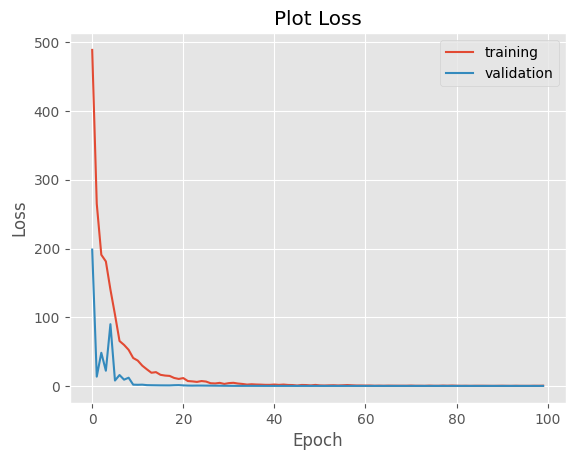

In [41]:
import os

# Create the 'images' directory if it doesn't exist
os.makedirs('images', exist_ok=True)

plt.style.use("ggplot")
plt.figure()
# Replace num_epochs with the actual number of epochs (100 in this case)
plt.plot(np.arange(0, 100), history.history["loss"], label="training")  # metrics was 'mae' and should be changed to 'loss' for the code to run
plt.plot(np.arange(0, 100), history.history["val_loss"], label="validation") # metrics was 'mae' and should be changed to 'loss' for the code to run
plt.title("Plot Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('images/plot_acc.png')
plt.show()

In [42]:
# Assume user_id is the ID of the user you want to generate recommendations for
user_id = 5 # Replace with the actual user ID

# Get list of merchant_ids the user has not interacted with
resto_not_visited = ratings[ratings['user_id'] != user_id]['merchant_id'].unique()
resto_not_visited = list(zip(resto_not_visited, [user_id] * len(resto_not_visited)))

# Create user_resto_array for prediction
user_resto_array = np.array(resto_not_visited)

# Get food ratings by the user
food_by_user = ratings[ratings['user_id'] == user_id]

# Now you can predict ratings
rate = model.predict(user_resto_array).flatten()

# Get the indices of the top 10 recommended restaurants (or all if less than 10)
num_recommendations = min(len(rate), 10)  # Ensure 10 or fewer
top_ratings_indices = rate.argsort()[-num_recommendations:][::-1]

recommended_resto_ids = [resto_not_visited[x][0] for x in top_ratings_indices]

print('Menampilkan rekomendasi untuk pengguna: {}'.format(user_id))
print('===' * 10)
print('Makanan dengan rating tinggi dari pengguna')
print('----' * 10)

top_resto_user = (
    food_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    ['merchant_id'].values
)

resto_df_rows = foods[foods['merchant_id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(f'{row.name}: ({row.description}) Rp.{row.price}')

print('----' * 10)
print('Rekomendasi makanan teratas')
print('----' * 10)

recommended_resto = foods[foods['merchant_id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(f'{row.name}: ({row.description}) Rp.{row.price}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Menampilkan rekomendasi untuk pengguna: 5
Makanan dengan rating tinggi dari pengguna
----------------------------------------
Rawon: (Sup khas Jawa Timur dengan kuah hitam dari kluwek.) Rp.25000
----------------------------------------
Rekomendasi makanan teratas
----------------------------------------
Sate Padang: (Sate khas Padang dengan kuah kental yang pedas.) Rp.20000
Tahu Gejrot: (Tahu goreng dengan kuah asam manis pedas.) Rp.10000
Nasi Uduk: (Nasi gurih dengan lauk pauk tradisional.) Rp.15000
Mie Kocok Bandung: (Mie khas Bandung dengan kuah kaldu sapi.) Rp.20000
Pepes Ikan: (Ikan dengan bumbu rempah yang dibungkus daun pisang.) Rp.25000
Bandrek: (Minuman tradisional hangat dengan jahe dan rempah.) Rp.10000
Wedang Ronde: (Minuman jahe dengan ronde dan kacang.) Rp.15000
Bakmi Jawa: (Bakmi khas Jawa dengan rasa gurih dan rempah.) Rp.20000
Nasi Pecel: (Nasi dengan sayuran rebus dan bumbu kacang.) Rp.15000
Ayam Taliwang: (Ayam khas Lombok dengan

# Save Model

In [43]:
model.save('model.h5')

In [44]:
model.save('model.keras')

# Convert Model

In [45]:
# mengubah model.h5 kedalam bentuk json
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2024-12-09 15:47:48.719762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733759268.746308   14684 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733759268.754241   14684 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file
